In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import time
from tqdm import tqdm

In [2]:
%matplotlib notebook

In [25]:
class DiffMatrix():
    
    def __init__(self,
                size= 300,
                diffusion_characteristics = 'default'):
#       Reaction caracteristics
        if diffusion_characteristics == 'default':
            self.diff_a = 1
            self.diff_b = 0.5
            self.feed_rate = 0.055
            self.kill_rate = 0.062
            self.timestep = 1
            self.laplace_window = 3
        
    
        self.size = size
        self.matrix_shape = (int(self.size), int(self.size))
        self.matrix_a = self.initiate_matrix()
        self.matrix_b = self.initiate_matrix()
        self.matrix_a_new = self.initiate_matrix()
        self.matrix_b_new = self.initiate_matrix()
    
    def initiate_matrix(self):
        matrix = np.zeros(self.matrix_shape)
        return matrix
    
    def fill_matrix_tiny(self):
        for matrix in (self.matrix_a, self.matrix_b):
            matrix[1][2] = 0.3
            matrix[1][3] = 0.3
            matrix[2][2] = 0.3

    def fill_matrix_random(self):
        self.matrix_a = np.random.rand(*self.matrix_shape)
        self.matrix_b = np.random.rand(*self.matrix_shape)
        
    def fill_matrix_propper(self):
        self.matrix_a = np.ones(self.matrix_shape)
        self.matrix_b = np.zeros(self.matrix_shape)
        
        start_b = int(0.3 * self.size)
        end_b = int(0.7 * self.size)
        self.matrix_b[start_b:end_b,start_b:end_b] = 1

    
    def switch_new(self):
        self.matrix_a = self.matrix_a_new.copy()
        self.matrix_b = self.matrix_b_new.copy()
    
    def feed(self):
        # create a up until 1
        self.matrix_a_new += self.feed_rate * (1- self.matrix_a)
        #bestroy b if any
        self.matrix_b_new -= (self.feed_rate + self.kill_rate)* self.matrix_b
    
    def react(self):
        #consume a and turn it into b
        reaction_rate = self.matrix_a * self.matrix_b * self.matrix_b
        self.matrix_a_new -= reaction_rate
        self.matrix_b_new += reaction_rate
        
        
    def diffuse(self):
        dm.matrix_a_new += ndimage.generic_filter(dm.matrix_a, self.lap_filter, size=(3,3))
    
    def lap_filter(self,x):
        x = x.reshape((self.laplace_window,self.laplace_window))
        filter_total = x[1][1] * -1
        
        # cross:
        filter_total += x[1][1] * 0.2
        filter_total += x[0][1] * 0.2
        filter_total += x[1][2] * 0.2
        filter_total += x[2][1] * 0.2
        
        #diag
        filter_total += x[0][0] * 0.05
        filter_total += x[2][0] * 0.05
        filter_total += x[0][2] * 0.05
        filter_total += x[2][2] * 0.05
        
        return filter_total
    
    def _next(self):
#         print('=== start')
#         print('diffuse')
        self.diffuse()
#         print(self.matrix_a_new)

#         print('feed')
        self.feed()
#         print(self.matrix_a_new)
#         print('react')
        self.react()
#         print(self.matrix_a_new)

        self.switch_new()
        self.matrix_a_new = self.initiate_matrix()
        self.matrix_b_new = self.initiate_matrix()
    
        

In [26]:
# dm.matrix_a.mean()
# dm.matrix_b[3:]
def plot_matrixes(dm):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
    axes[0].imshow(dm.matrix_a, cmap='binary', interpolation='nearest',vmin=0, vmax=1)
    axes[1].imshow(dm.matrix_b, cmap='binary', interpolation='nearest',vmin=0, vmax=1)

In [35]:
dm = DiffMatrix(size = 200)
dm.fill_matrix_propper()
print(dm.matrix_a.mean())
print(dm.matrix_b.mean())

1.0
0.16


  0%|          | 0/30 [00:00<?, ?it/s]/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in multiply


-1.5151165943940618e+135
1.5151165943940618e+135


  3%|▎         | 1/30 [00:00<00:08,  3.32it/s]/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars


inf
-inf


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in add
  7%|▋         | 2/30 [00:00<00:08,  3.32it/s]/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in multiply
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars


nan
inf


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in double_scalars
 10%|█         | 3/30 [00:00<00:08,  3.26it/s]/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


nan
nan


 13%|█▎        | 4/30 [00:01<00:08,  3.16it/s]

nan
nan


 17%|█▋        | 5/30 [00:01<00:07,  3.26it/s]

nan
nan


 20%|██        | 6/30 [00:01<00:07,  3.19it/s]

nan
nan


 23%|██▎       | 7/30 [00:02<00:06,  3.31it/s]

nan
nan


 27%|██▋       | 8/30 [00:02<00:07,  3.13it/s]

nan
nan


 30%|███       | 9/30 [00:02<00:06,  3.14it/s]

nan
nan


 33%|███▎      | 10/30 [00:03<00:06,  3.06it/s]

nan
nan


 37%|███▋      | 11/30 [00:03<00:05,  3.20it/s]

nan
nan


 40%|████      | 12/30 [00:03<00:05,  3.19it/s]

nan
nan


 43%|████▎     | 13/30 [00:04<00:05,  3.03it/s]

nan
nan


 47%|████▋     | 14/30 [00:04<00:05,  3.02it/s]

nan
nan


 50%|█████     | 15/30 [00:04<00:05,  2.87it/s]

nan
nan


 53%|█████▎    | 16/30 [00:05<00:04,  3.04it/s]

nan
nan


 57%|█████▋    | 17/30 [00:05<00:04,  3.02it/s]

nan
nan


 60%|██████    | 18/30 [00:05<00:03,  3.11it/s]

nan
nan


 63%|██████▎   | 19/30 [00:06<00:03,  2.98it/s]

nan
nan


 67%|██████▋   | 20/30 [00:06<00:03,  3.06it/s]

nan
nan


 70%|███████   | 21/30 [00:06<00:02,  3.16it/s]

nan
nan


 73%|███████▎  | 22/30 [00:07<00:02,  3.22it/s]

nan
nan


 77%|███████▋  | 23/30 [00:07<00:02,  3.28it/s]

nan
nan


 80%|████████  | 24/30 [00:07<00:01,  3.07it/s]

nan
nan


 83%|████████▎ | 25/30 [00:07<00:01,  3.18it/s]

nan
nan


 87%|████████▋ | 26/30 [00:08<00:01,  2.94it/s]

nan
nan


 90%|█████████ | 27/30 [00:08<00:00,  3.10it/s]

nan
nan


 93%|█████████▎| 28/30 [00:08<00:00,  3.21it/s]

nan
nan


 97%|█████████▋| 29/30 [00:09<00:00,  3.23it/s]

nan
nan


100%|██████████| 30/30 [00:09<00:00,  3.29it/s]

nan
nan


<IPython.core.display.Javascript object>


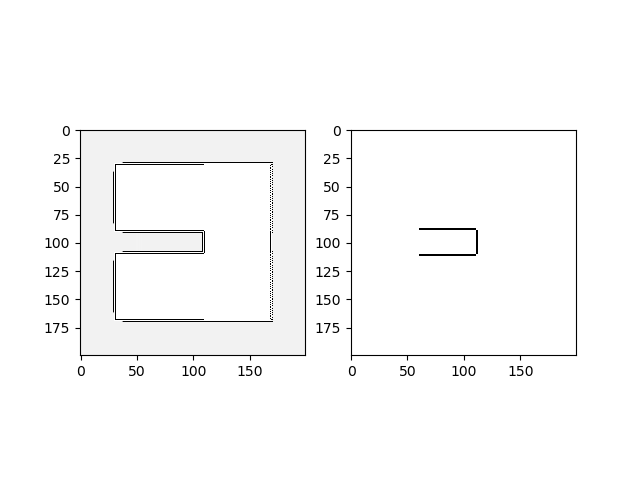

In [39]:
for i in tqdm(range(30)):
    print(dm.matrix_a.mean())
    print(dm.matrix_b.mean())
    dm._next()


print(dm.matrix_a.mean())
print(dm.matrix_b.mean())
plot_matrixes(dm)

In [20]:
plt.imshow(dm.matrix_a, cmap='binary', interpolation='nearest',vmin=0, vmax=1)
plt.show()

In [36]:
A = range(16)

In [40]:
A = np.reshape(range(16),(4,4))

In [41]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [41]:
A[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])